In [24]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import gzip
from collections import defaultdict
import random
def parseData(fname):
    for l in open(fname):
        yield eval(l)

In [25]:
rent = pd.read_csv('clean.csv')

In [26]:
rent

,fit,user_id,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date,size_guess_fit,bust_num,bust_char
0,fit,420272,2260466,0.0000,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,culott,6.83,1.754825,3.367296,"April 20, 2016",8.584825,34,d
1,fit,273551,153475,-2.2675,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,culott,1.75,-0.245175,3.610918,"June 18, 2013",-0.762675,34,b
2,fit,360448,1063761,0.0000,10.0,party,This hugged in all the right places! It was a ...,other,It was a great time to celebrate the (almost) ...,culott,-3.33,-8.245175,4.762174,"December 14, 2015",-11.575175,34,dd
3,fit,909926,126335,-0.9070,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,culott,-0.79,-4.245175,3.555348,"February 12, 2014",-5.942175,34,c
4,fit,151944,616682,3.6280,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,culott,9.37,-0.245175,3.332205,"September 26, 2016",12.752825,34,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192539,fit,66386,2252812,1.3605,10.0,work,Fit like a glove!,hourglass,LOVE IT!!! First Item Im thinking of buying!,culott,9.37,-4.245175,3.761200,"May 18, 2016",6.485325,34,dd
192540,fit,118398,682043,-16.7795,10.0,work,The pattern contrast on this dress is really s...,petite,LOVE it!,culott,-10.95,-8.245175,3.401197,"September 30, 2016",-35.974675,32,c
192541,fit,47002,683251,-0.9070,6.0,everyday,"Like the other DVF wraps, the fit on this is f...",straight & narrow,"Loud patterning, flattering fit",culott,6.83,-4.245175,3.465736,"March 4, 2016",1.677825,36,a
192542,fit,961120,126335,12.6980,10.0,wedding,This dress was PERFECTION. it looked incredib...,pear,loved this dress it was comfortable and photog...,culott,1.75,3.754825,3.465736,"November 25, 2015",18.202825,36,c


In [18]:
lst = []
for i in ['fit', 'user_id', 'bust size', 'item_id', 'weight', 'rating',
       'rented for', 'body type', 'category',
       'height', 'size', 'age','size_guess_fit',
       'bust_num', 'bust_char']:
    lst.append([i, len(rent[i].value_counts()), list(rent[i].value_counts().index)[:3]])
pd.DataFrame(lst)

,0,1,2
0,fit,3,"[fit, small, large]"
1,user_id,105571,"[691468, 32925, 362951]"
2,bust size,106,"[34b, 34c, 34dd]"
3,item_id,5850,"[126335, 174086, 123793]"
4,weight,190,"[0.0, -3.1745, -0.907]"
5,rating,6,"[10.0, 8.0, 6.0]"
6,rented for,9,"[wedding, formal affair, party]"
7,body type,8,"[hourglass, athletic, pear]"
8,category,7,"[culott, tshirt, coat]"
9,height,25,"[-3.329999999999984, 1.7500000000000284, -0.78..."


In [27]:
rent.dtypes

fit                object
user_id             int64
item_id             int64
weight            float64
rating            float64
rented for         object
review_text        object
body type          object
review_summary     object
category           object
height            float64
size              float64
age               float64
review_date        object
size_guess_fit    float64
bust_num            int64
bust_char          object
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017E583FB400>,
      dtype=object)

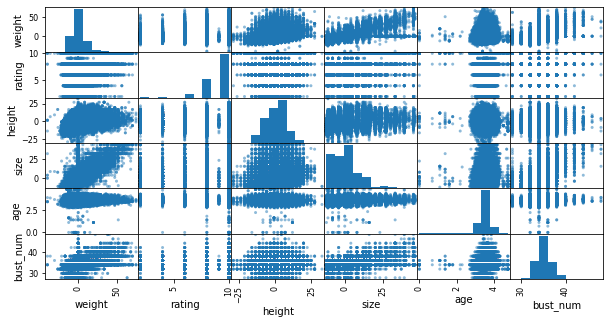

In [23]:
pd.plotting.scatter_matrix(rent[['weight', 'rating', 'height', 'size', 'age', 'bust_num']], figsize=(10, 5))

In [11]:
rent

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137.0,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,1.7272,14.0,28.0,"April 20, 2016"
1,fit,273551,34b,153475,132.0,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,1.6764,12.0,36.0,"June 18, 2013"
2,fit,360448,other,1063761,137.0,10.0,party,This hugged in all the right places! It was a ...,other,It was a great time to celebrate the (almost) ...,sheath,1.6256,4.0,116.0,"December 14, 2015"
3,fit,909926,34c,126335,135.0,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,1.6510,8.0,34.0,"February 12, 2014"
4,fit,151944,34b,616682,145.0,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,1.7526,12.0,27.0,"September 26, 2016"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192457,fit,66386,34dd,2252812,140.0,10.0,work,Fit like a glove!,hourglass,LOVE IT!!! First Item Im thinking of buying!,jumpsuit,1.7526,8.0,42.0,"May 18, 2016"
192458,fit,118398,32c,682043,100.0,10.0,work,The pattern contrast on this dress is really s...,petite,LOVE it!,dress,1.5494,4.0,29.0,"September 30, 2016"
192459,fit,47002,36a,683251,135.0,6.0,everyday,"Like the other DVF wraps, the fit on this is f...",straight & narrow,"Loud patterning, flattering fit",dress,1.7272,8.0,31.0,"March 4, 2016"
192460,fit,961120,36c,126335,165.0,10.0,wedding,This dress was PERFECTION. it looked incredib...,pear,loved this dress it was comfortable and photog...,dress,1.6764,16.0,31.0,"November 25, 2015"
